# **Trabalho Introdução a Ciência de Dados - Animes**

**Grupo**: 6

**Integrantes**:
*   Gabriel Nunes ()
*   João Costa ()
*   Rubia Alice (2022043507)
*   Vitor ()

**Link apresentação Youtube**:

# Configurações Padrões
___

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats as ss
import statsmodels.api as sm

In [ ]:
plt.rcParams['figure.figsize']  = (16, 10)
#plt.rcParams['axes.labelsize']  = 20
#plt.rcParams['axes.titlesize']  = 20
#plt.rcParams['legend.fontsize'] = 20
#plt.rcParams['xtick.labelsize'] = 20
#plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()
plt.style.use('seaborn-colorblind')

# Carregando as Bases de Dados
___

## Carregando Base do IMDB

**Fonte**: [Japanese Anime: An In-Depth IMDb Data Set](https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb)

Observação: Decidimos não utilizar essa base de dados, pois a do My Anime List estava mais completa e organizada.

In [ ]:
# Definindo as constantes de acesso
URL_BASES_DADOS = "https://raw.githubusercontent.com/Rubia-Souza/UFMG-ICD-Animes/main/BasesDados/"

NOME_CSV_IMDB = "imdb_animes.csv"
NOME_CSV_MY_ANIME_LIST = "my-anime-list-animes.csv"

In [ ]:
# Importando base de dados de Animes do IMDB
url_imdb = URL_BASES_DADOS + NOME_CSV_IMDB
df_animes_imdb = pd.read_csv(url_imdb)

In [ ]:
df_animes_imdb.head(5)

In [ ]:
df_animes_imdb.info()

## Carregando Base do My Anime List

**Fonte**: [Anime Database 2022](https://www.kaggle.com/datasets/harits/anime-database-2022)


As colunas da base são:
* **ID**: É o ID do anime no site MyAnimeList.net
* **Title**: É o titulo original do anime
* **Synonyms**: São nomes sinônimos aos titulos do anime
* **Japanese**: É o título do anime em japonês
* **English**: É o título do anime em inglês
* **Synopsis**: É a sinopse do anime
* **Type**: É o tipo do anime
* **Episodes**: É a quatindade de episódios do anime
* **Status**: É o status do anime: Se ele já foi estreado ou não ou está em andamento
* **Start_Aired**: É a data ou ano que o anime foi estreado
* **End_Aired**: É a data ou ano que o anime foi encerrado
* **Premiered**: A temporada de estreia do anime
* **Broadcast**: É a grade de horários do anime, com o horário e dia em que ele é exibido
* **Producers**: A lista de produtoras do anime
* **Licensors**: A lista de licenciantes do anime
* **Studios**: A lista de estúdios
* **Source**: A mídia em que o anime foi baseado
* **Genres**: A lista de gêneros do anime
* **Themes**: A lista de temas que o anime aborda
* **Demographics**: A lista de demografias do anime
* **Duration_Minutes**: Tempo de duração de cada episódio
* **Rating**: Classificação indicativa do anime
* **Score**: Média das notas atribuidas pelos usuários do MyAnimeList.net
* **Scored_Users**: Quantidade de usuários que deram uma avaliação para o anime
* **Ranked**: É o Ranking do anime com base no Score
* **Popularity**: É o Ranking do anime com base em sua popularidade, que é a quantidade de usuários que o adicionaram a lista do MyAnimeList
* **Members**: Quantidade de usuários que adicionaram o anime a sua lista do MyAnimeList
* **Favorites**: Quantidade de usuários que marcaram o anime como Favorito


In [ ]:
# Importando base de dados de Animes do My Anime List
url_anime_list = URL_BASES_DADOS + NOME_CSV_MY_ANIME_LIST
df_animes_anime_list = pd.read_csv(url_anime_list)

In [ ]:
df_animes_anime_list.head(5)

In [ ]:
df_animes_anime_list.info()

# Limpeza e Manipulação dos Dados
___

Nesta base temos diferentes tipos de mídia em que os animes foram publicados:

*   **TV**: São as animações que foram produzidas e exibidas na TV do Japão.
*   **Movie**: São filmes de animações japonesas.
*   **ONA**: Animações que foram publicadas apenas em meio digital, como aplicatvios de streaming.
*   **OVA**: Animações que foram publicadas apenas em mídia física, como DVDs e
*   **Special**: Animações especiais que foram produzidas para a TV, mas possui uma história fechada ou a parte da franquia principal.
*   **Music**: São animações criadas para videoclipes de músicas.
*   **Unknown**: São animações que não tem um tipo definido ou conhecido.

In [ ]:
df_animes_anime_list["Type"].unique()

A fim de deixar a análise mais direcionada, iremos apenas considerar os animes que foram exibidos na TV do Japão, uma vez que é o estilo mais comum.

In [ ]:
df_my_anime_list = df_animes_anime_list[df_animes_anime_list['Type'] == 'TV']
df_my_anime_list.info()

Além disso, temos que alguns dados estão agrupados em listas em uma mesma linha, como no caso de Themes e Genres, pois um anime pode abordar vários temas e ser de um ou mais temas.

Assim, podemos criar bases que possuem essas linhas separadas, gerando uma nova linha para cada valor diferente em uma mesma entrada.

In [ ]:
# Essa função separa as linhas por tipos de Themes diferentes
def criar_dataframe_com_temas_separados():
  df_filtrado = df_my_anime_list.copy()
  df_filtrado = df_filtrado[df_filtrado["Themes"] != "Unknown"].copy()

  df_filtrado["Themes"] = df_filtrado["Themes"].str.split(",")
  df_filtrado = df_filtrado.explode("Themes", ignore_index = True)
  df_filtrado["Themes"] = df_filtrado["Themes"].str.strip()

  return df_filtrado.copy()

In [ ]:
# Essa função separa as linhas por Genres diferentes
def criar_dataframe_com_generos_separados():
  df_filtrado = df_my_anime_list.copy()
  df_filtrado = df_filtrado[df_filtrado["Genres"] != "Unknown"].copy()

  df_filtrado["Genres"] = df_filtrado["Genres"].str.split(",")
  df_filtrado = df_filtrado.explode("Genres", ignore_index = True)
  df_filtrado["Genres"] = df_filtrado["Genres"].str.strip()

  return df_filtrado.copy()

In [ ]:
def criar_dataframe_com_todos_grupos_separados():
  df_separado = df_my_anime_list.copy()

  # Separa strings por ','
  df_separado["Themes"] = df_separado["Themes"].str.split(",")
  df_separado["Genres"] = df_separado["Genres"].str.split(",")
  df_separado["Demographics"] = df_separado["Demographics"].str.split(",")

  # Separa linhas para cada entrada diferente dos grupos
  df_separado = df_separado.explode("Themes", ignore_index = True)
  df_separado = df_separado.explode("Genres", ignore_index = True)
  df_separado = df_separado.explode("Demographics", ignore_index = True)

  # Remove espaços em branco das strings
  df_separado["Themes"] = df_separado["Themes"].str.strip()
  df_separado["Genres"] = df_separado["Genres"].str.strip()
  df_separado["Demographics"] = df_separado["Demographics"].str.strip()

  return df_separado

# Visualização de Dados
___

## Contagem de Animes por Temas
Quais os temas mais comuns de serem abordados em animes?

A primeira pergunta que desejamos responder é: "Quais os temas mais comuns de serem abordados em animes?".

Para isso, podemos contar a quantidade de animes que abordam cada tema. Como um anime pode abordar mais de um tema, criar uma linha nova para cada tema que um anime aborda.

In [ ]:
def plot_contagem_temas_presentes_animes():
  df_temas = criar_dataframe_com_temas_separados()

  df_temas = df_temas[["Title", "Themes",  "Demographics", "Favorites", "Members", "Score", "Scored_Users"]].copy()
  df_temas = df_temas[df_temas["Themes"] != "Unknown"].copy()

  df_temas = (
                df_temas[["Themes", "Title"]].
                  groupby("Themes").
                  count().
                  rename(columns = {"Title": "Quantidade_Animes"}).
                  sort_values(by="Quantidade_Animes", ascending = False).
                  reset_index()
              )

  plot = sns.barplot(df_temas, x="Quantidade_Animes", y="Themes", color="steelblue")

  plot.set(title="Temas mais prevalentes em animes")
  plot.set_ylabel("Tema")
  plot.set_xlabel("Quantidade de Animes")

  plt.show()

In [ ]:
plot_contagem_temas_presentes_animes()

## Contagem de Animes por Gênero

Quais os gêneros mais comuns entre animes?

Também podemos responder uma pergunta semelhate: "Quais os gêneros mais comuns entre animes?".

Usaremos uma lógica parecida. Iremos contar a quantidade de cada anime de um determinado gênero.

In [ ]:
def plot_contagem_animes_por_genero():
  df_generos = criar_dataframe_com_generos_separados()

  df_generos = df_generos[["Title", "Genres", "Demographics", "Favorites", "Members", "Score", "Scored_Users"]]
  df_generos = df_generos[df_generos["Genres"] != "Unknown"].copy()

  df_contagem_animes_por_genero = (
                                    df_generos[["Genres", "Title"]].
                                      groupby("Genres").
                                      count().
                                      rename(columns = {"Title": "Quantidade_Animes"}).
                                      sort_values(by="Quantidade_Animes", ascending = False).
                                      reset_index()
                                  )

  plot = sns.barplot(df_contagem_animes_por_genero, x="Quantidade_Animes", y="Genres", color="steelblue")

  plot.set(title="Quantidade de Animes de determinado Gênero")
  plot.set_ylabel("Gênero")
  plot.set_xlabel("Quantidade de Animes")

  plt.show()

In [ ]:
plot_contagem_animes_por_genero()

## Gêneros Mais Bem Avaliados

Quais são os gêneros mais bem avaliados?

Outra pergunta que podemos responder é: "Quais os gêneros de animes melhores avaliados?".

Para isso, devemos definir qual métrica de comparação iremos utilizar. Nesta base, temos 3 métricas:

*   **Score**: Nota média atribuida com base nas avaliações dos usuários (Scored_Users é a quantidade de usuários que deram uma nota para determinado anime).

*   **Members**: A quantidade de usuários que adicionaram aquele anime a sua lista do My Anime Liste.

*   **Favorites**: A quantidade de usuários que marcaram aquele anime como favorito.

Além disso, podemos utilizar tanto a média quanto a mediana para essa comparação.

In [ ]:
def descrever_animes_por_genero_e(coluna_alvo):
  df_generos = criar_dataframe_com_generos_separados()

  df_generos = df_generos[["Title", "Genres", "Demographics", "Favorites", "Members", "Score", "Scored_Users"]]
  df_generos = df_generos[df_generos["Genres"] != "Unknown"].copy()

  return df_generos[["Genres", coluna_alvo]].groupby("Genres").describe()

### Avaliando Gêneros por Média

In [ ]:
def plot_bar_por_genero(coluna, operacao):
  df_generos = criar_dataframe_com_generos_separados()
  df_medias_generos = (
                        df_generos.
                          groupby("Genres").
                          agg(operacao, numeric_only = True).
                          reset_index()
                      )

  df_medias_scores_generos = df_medias_generos[["Genres", coluna]].sort_values(by = coluna, ascending = False)
  plot = sns.barplot(df_medias_scores_generos, x="Genres", y=coluna, color="steelblue")

  plt.xticks(rotation=45)
  plt.show()

#### Avaliando Gêneros por Score

In [ ]:
descrever_animes_por_genero_e("Score")

In [ ]:
plot_bar_por_genero("Score", "mean")

In [ ]:
plot_bar_por_genero("Scored_Users", "mean")

Comparando a média dos Scores, elas são bem próxmas entre os Gêneros, sendo que os Gênros de Mistério e Suspense foram os que tiveram maiores notas. Além disso, é possível notar que Suspense é o Gênero que mais recebe avaliações dos usuários.

#### Avaliando Gêneros por Quantidade de Membros

In [ ]:
descrever_animes_por_genero_e("Members")

In [ ]:
plot_bar_por_genero("Members", "mean")

Entre os diferentes Gêneros, os animes de Suspense tendem a ter mais Membros inscritos em média que os outros.

#### Avaliando Gêneros por Favoritos

In [ ]:
descrever_animes_por_genero_e("Favorites")

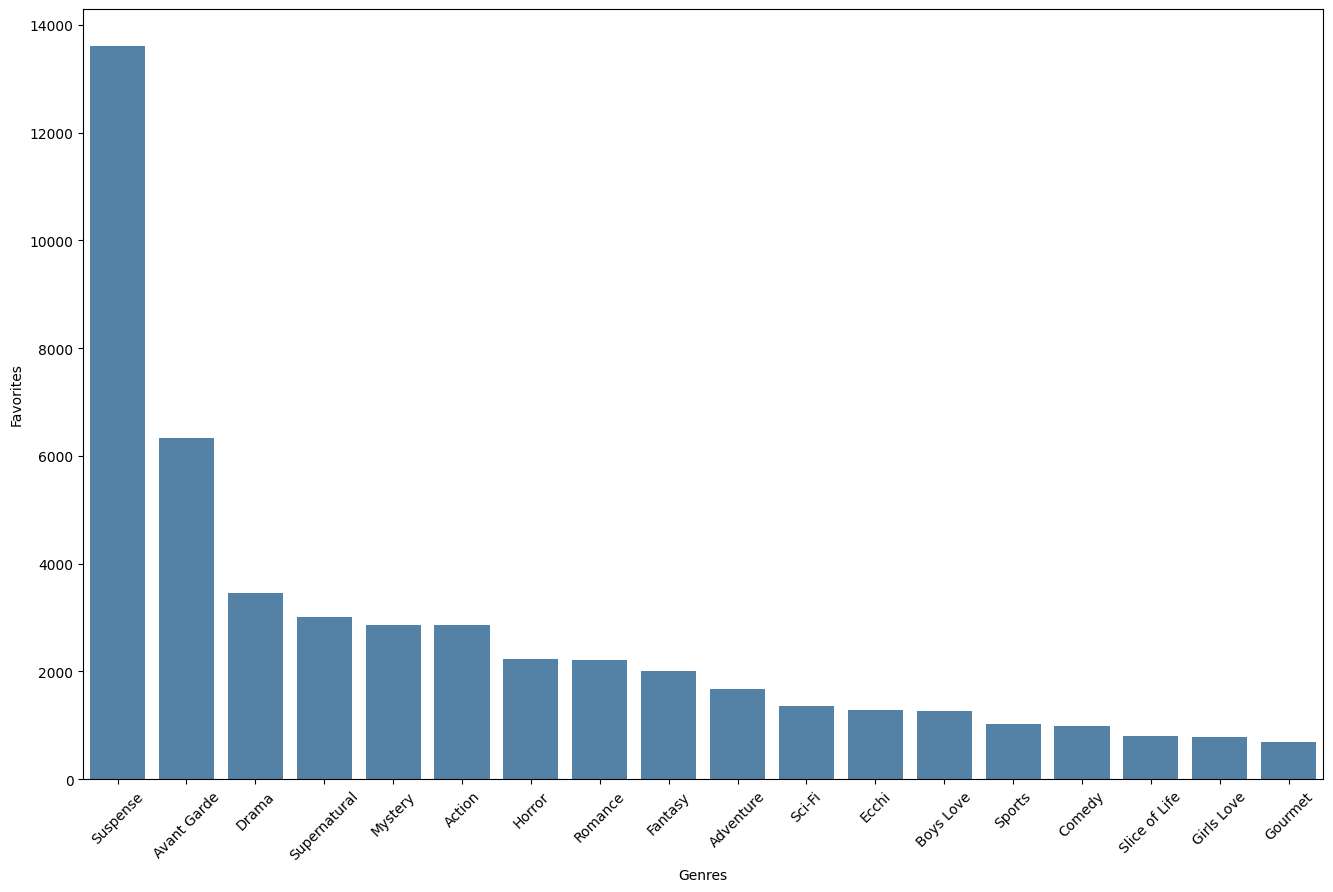

In [ ]:
plot_bar_por_genero("Favorites", "mean")

Já considerando a quantidade de Favoritos, novamente, Suspense foi aquele que recebeu mais favoritos em média pelos usuários.

### Avaliando Gêneros por Mediana

É possível notar pelos describes de cada um que o desvio padrão para o Score, Memebers e Favorites é grande. Por isso, achamos interessante também comparar Gêneros com base na mediana, uma vez que ela não é sensível aos outliers.

#### Avaliando Gêneros por Score

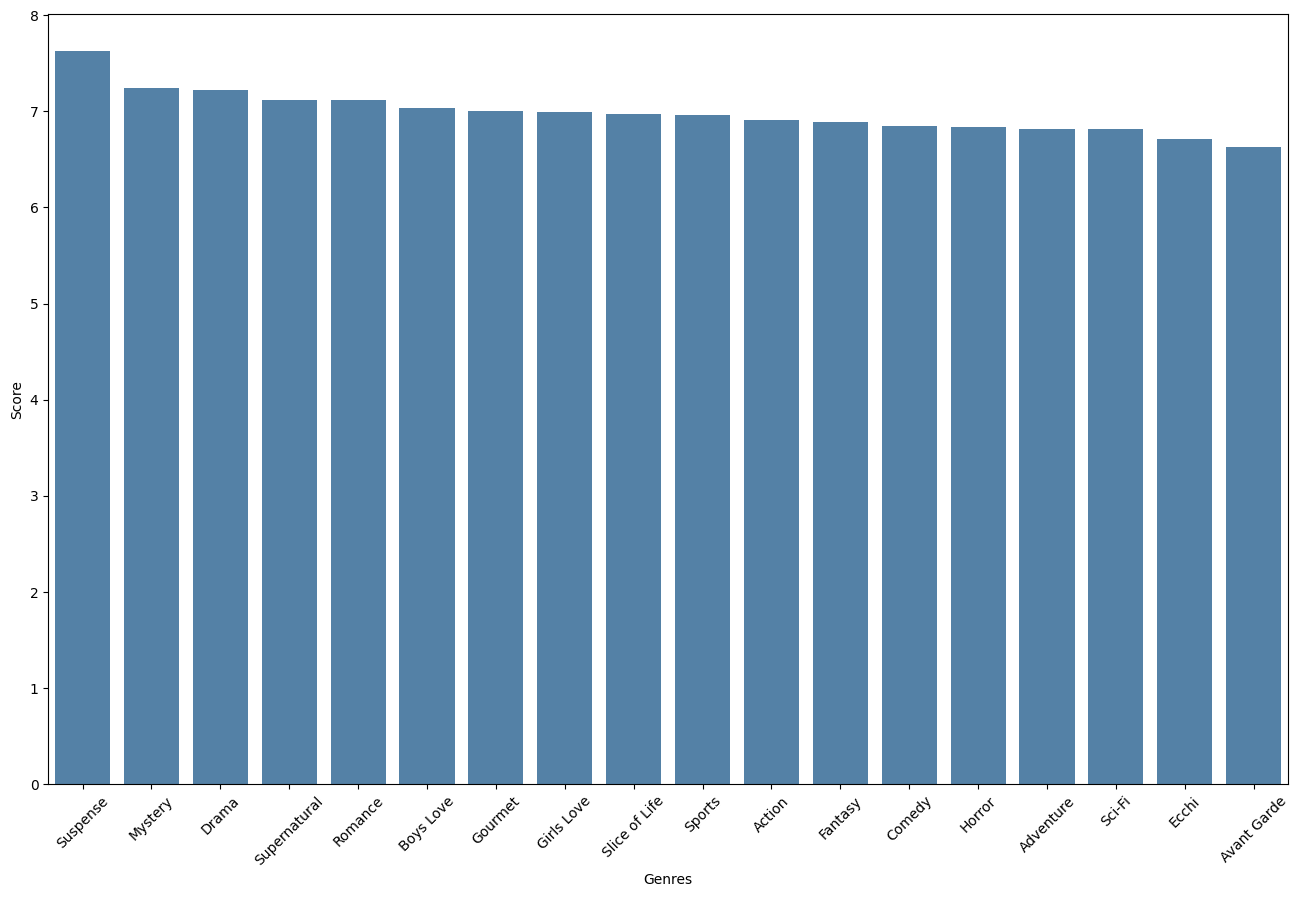

In [ ]:
plot_bar_por_genero("Score", "median")

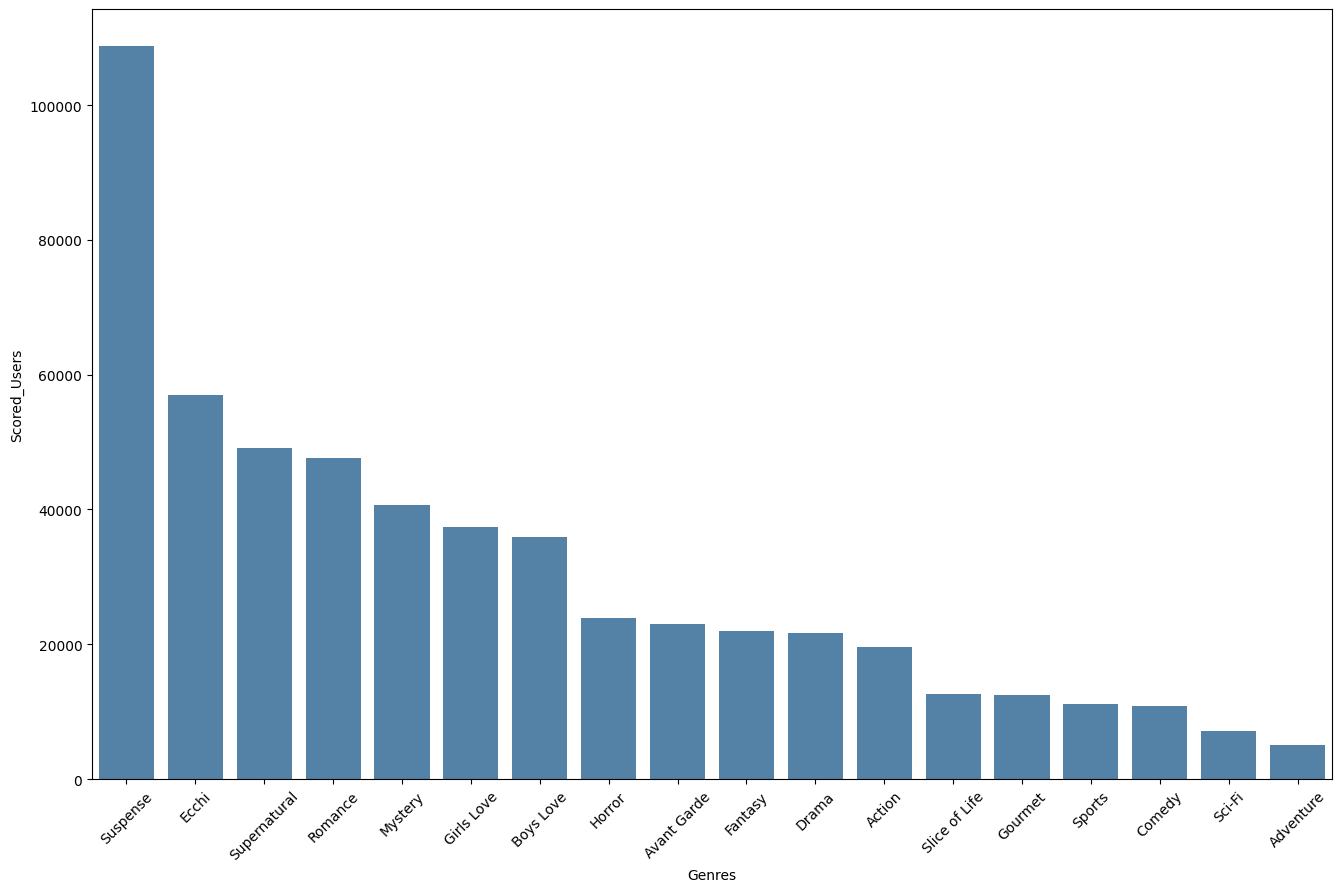

In [ ]:
plot_bar_por_genero("Scored_Users", "median")

#### Avaliando Gêneros por Quantidade de Membros

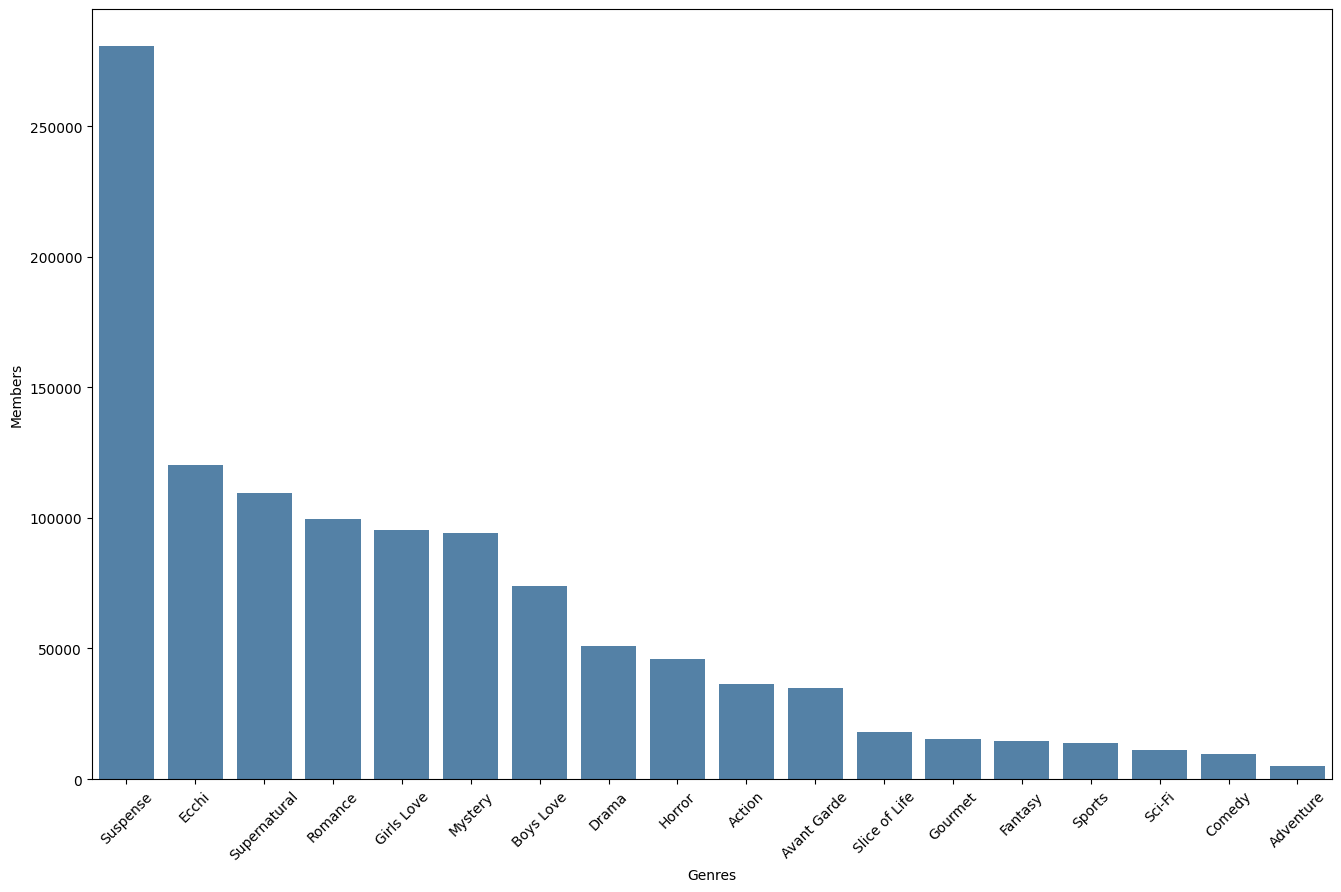

In [ ]:
plot_bar_por_genero("Members", "median")

#### Avaliando Gêneros por Favoritos

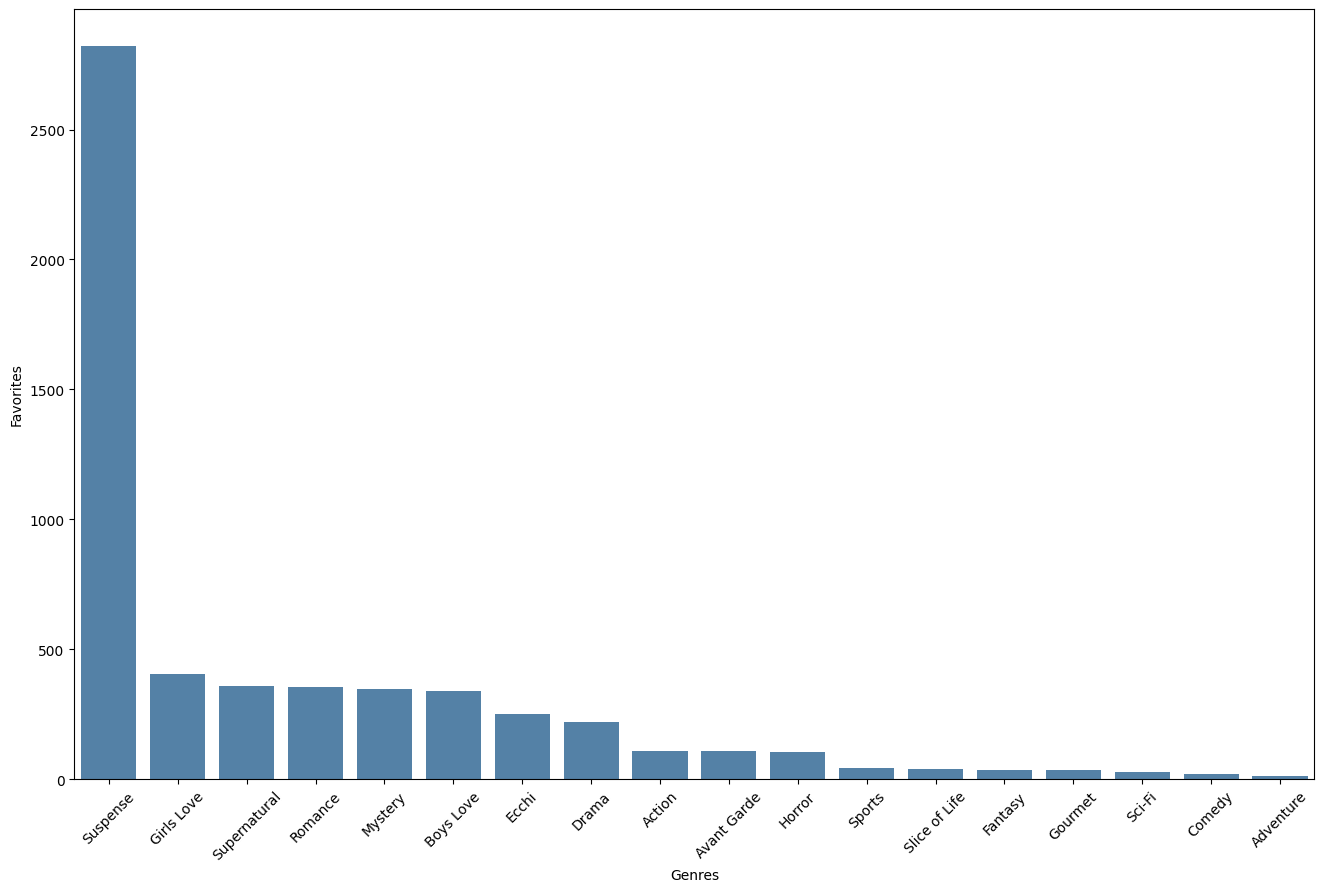

In [ ]:
plot_bar_por_genero("Favorites", "median")

Após essas análise, é possível perceber que independente de avaliarmos pela média ou pela mediana, temos que suspense é o Gênero mais bem avaliado nos três quesitos.

## Análises por Demografias

Será que esses interesses variam de acordo com o públic alvo?

### Avaliando Gêneros por Demografias

A popularidade de Gêneros se mantem entre as diferentes demografias de animes?

Uma questão muito comum em animes e produções japonesas é separar as obras por demografias. Elas são agrupadas da seguinte forma:

*   **Shounen:** São as produções voltadas ao público masculino jovem/adoslecente
*   **Shoujo:** São as produções voltadas ao público feminino jovem/adoslecente

*   **Seinen:** São as produções voltadas ao público masculino adulto
*   **Josei:** São as produções voltadas ao público feminino adulto

*   **Kids:** São as produções para o público infantil

Nós comparamos os Scores médios de cada Gênenro para cada Demografia. Além disso, realizamos o plot das demografias voltadas a uma faixa étaria em comum.

#### Realiza comparação da quantidade média de Membros por de Gênero para as Demografias jovens


In [ ]:
def plot_line_baseado_grupo_demografia(demografia_1, demografia_2):
  df_separado = criar_dataframe_com_todos_grupos_separados()
  df_separado = df_separado[df_separado["Genres"] != "Unknown"]

  filtro_demografia_1 = (df_separado["Demographics"] == demografia_1)
  filtro_demografia_2 = (df_separado["Demographics"] == demografia_2)

  df_demografia = df_separado[filtro_demografia_1 | filtro_demografia_2]

  dados_plot_demografia = (
                            df_demografia.
                              groupby(["Demographics", "Genres"]).
                              mean(numeric_only = True)
                          )

  plot = sns.lineplot(data=dados_plot_demografia, x="Genres", y="Members", hue="Demographics", marker="o")
  plt.xticks(rotation=45)
  plt.show()

  dados_plot_demografia = dados_plot_demografia.reset_index()

  return

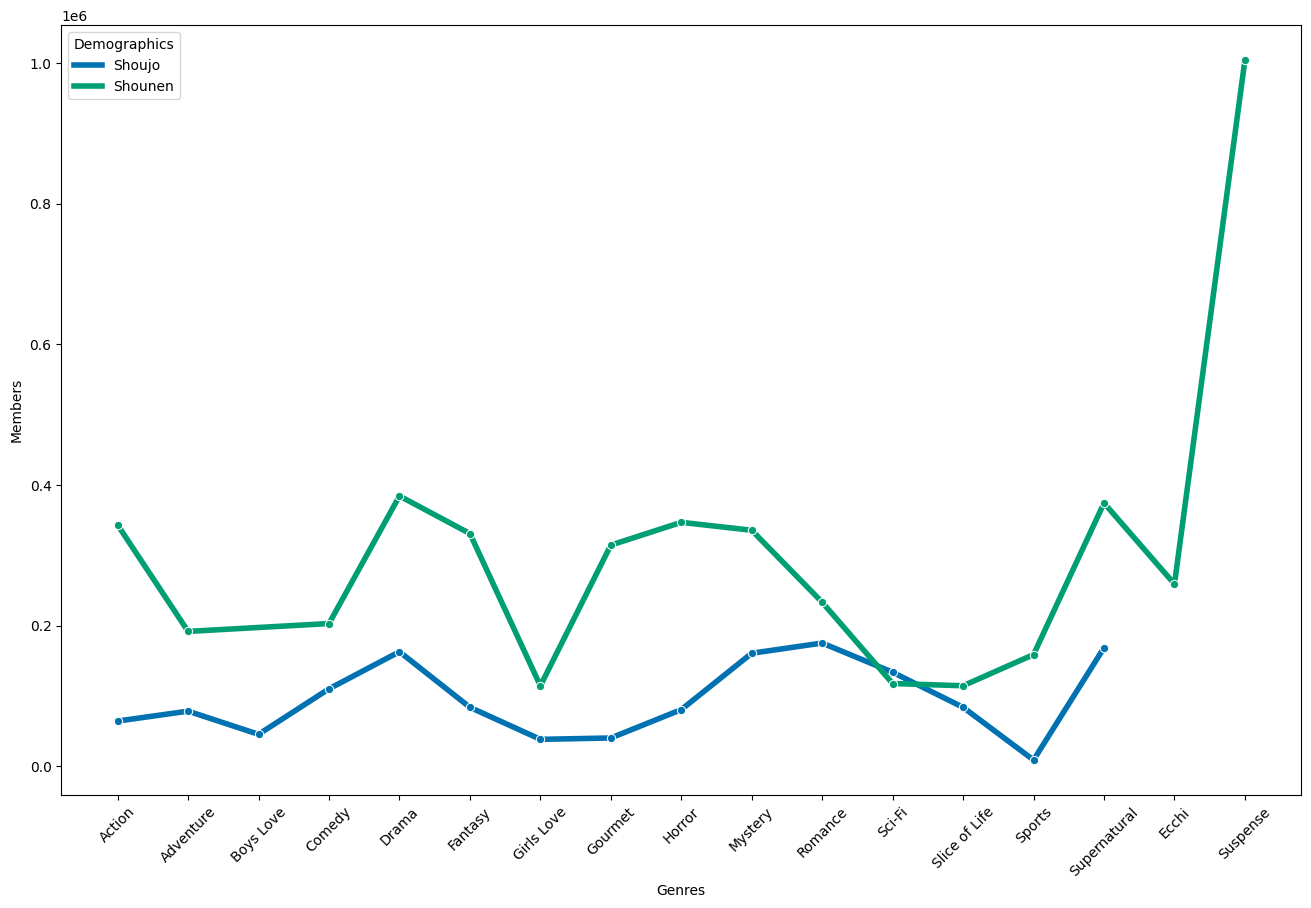

In [ ]:
plot_line_baseado_grupo_demografia("Shounen", "Shoujo")

#### Realiza comparação da quantidade média de Membros por Gênero para as Demografias adultas

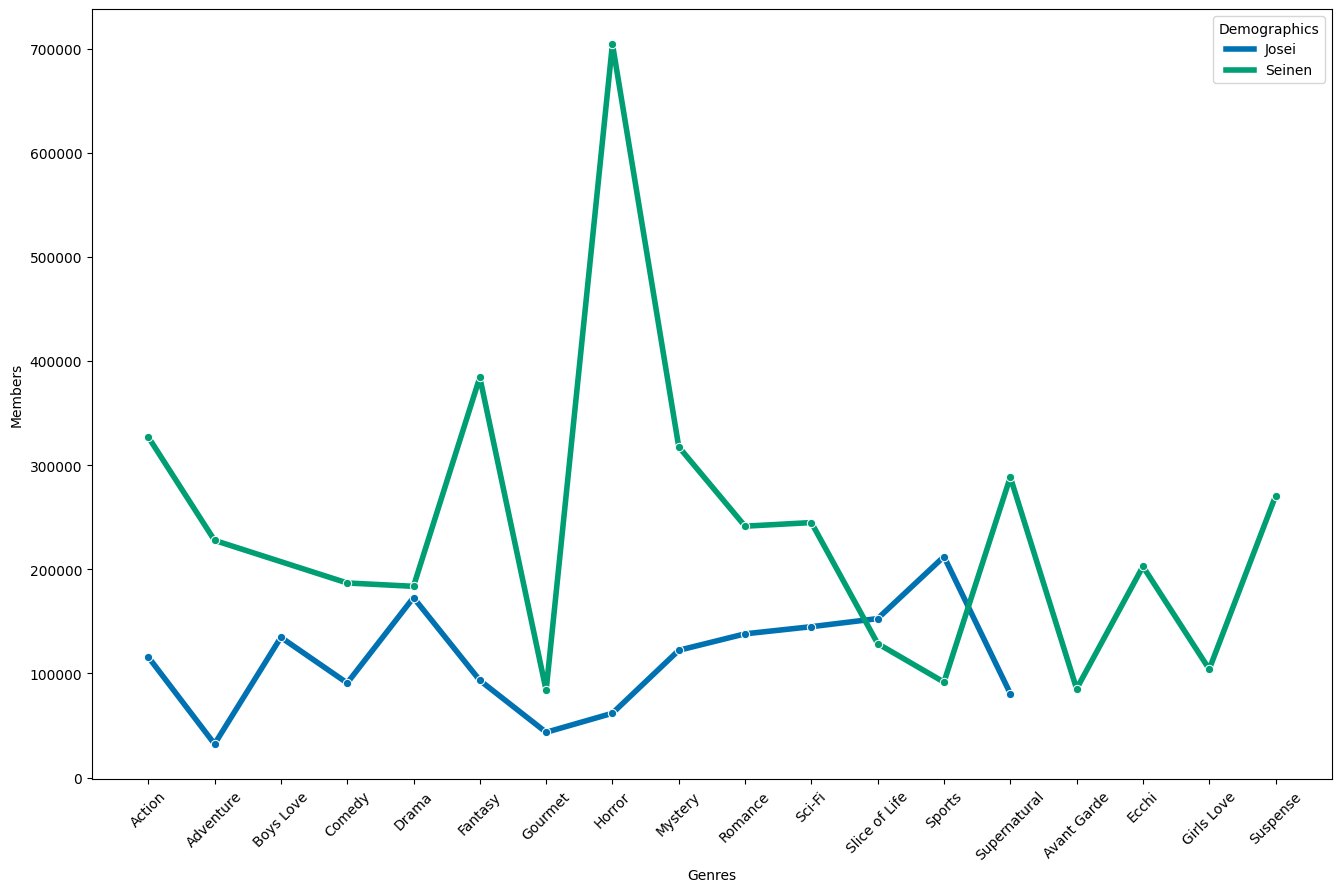

In [ ]:
plot_line_baseado_grupo_demografia("Seinen", "Josei")

#### Realiza comparação da quantidade média de Membros por Gênero para a Demografia infantil

In [ ]:
def plot_generos_por_demografia_infantil():
  df_separado = criar_dataframe_com_todos_grupos_separados()
  df_separado = df_separado[df_separado["Genres"] != "Unknown"]

  df_demografia_infatil = df_separado[df_separado["Demographics"] == "Kids"]

  dados_plot_demografia_infantil = (
                                      df_demografia_infatil.
                                        groupby(["Demographics", "Genres"]).
                                        mean(numeric_only = True).
                                        sort_values(by="Members", ascending=False).
                                        reset_index()
                                    )

  plot = sns.barplot(data=dados_plot_demografia_infantil, x="Genres", y="Members", color="steelblue")
  plt.xticks(rotation=45)
  plt.show()

  return

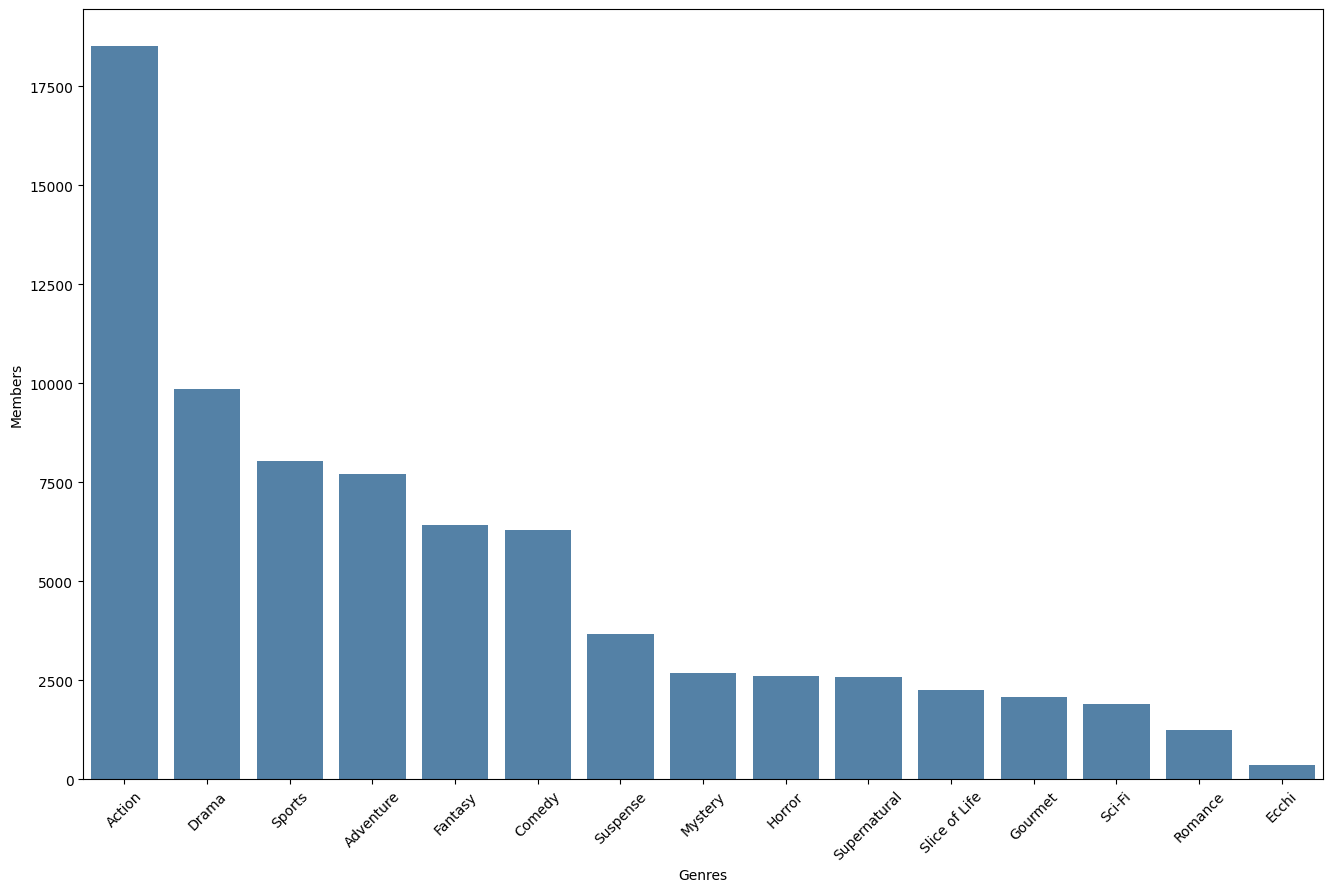

In [ ]:
plot_generos_por_demografia_infantil()

Com isso, conseguimos verificar quais Gêneros são mais prevalentes sobre cada demografia e como eles alternam entre elas.

### Avaliando Temas por Demografia

Os temas mais comuns em animes mudam de acordo com a demografia alvo?

Agora que já conhecemos as Demografias e já tivemos uma análise geral dos Gêneros e Temas. Podemos ver também se existe algum Tema de anime que é mais comum entre certas demografias.

In [ ]:
def plot_bar_temas_por_demografia(demografia):
  df_temas_demografia = criar_dataframe_com_todos_grupos_separados()
  df_temas_demografia = df_temas_demografia[df_temas_demografia["Themes"] != "Unknown"]

  dados_plot = (
                  df_temas_demografia.loc[df_temas_demografia["Demographics"] == demografia, ["Themes", "Title"]].
                    groupby("Themes").
                    count().
                    rename(columns = {"Title": "Quantidade_Animes"}).
                    sort_values(by="Quantidade_Animes", ascending=False).
                    reset_index()
               )

  plot = sns.barplot(data=dados_plot, x="Quantidade_Animes", y="Themes", color="steelblue")
  plt.show()
  return

#### Temas mais prevalentes entre as Demografias jovens

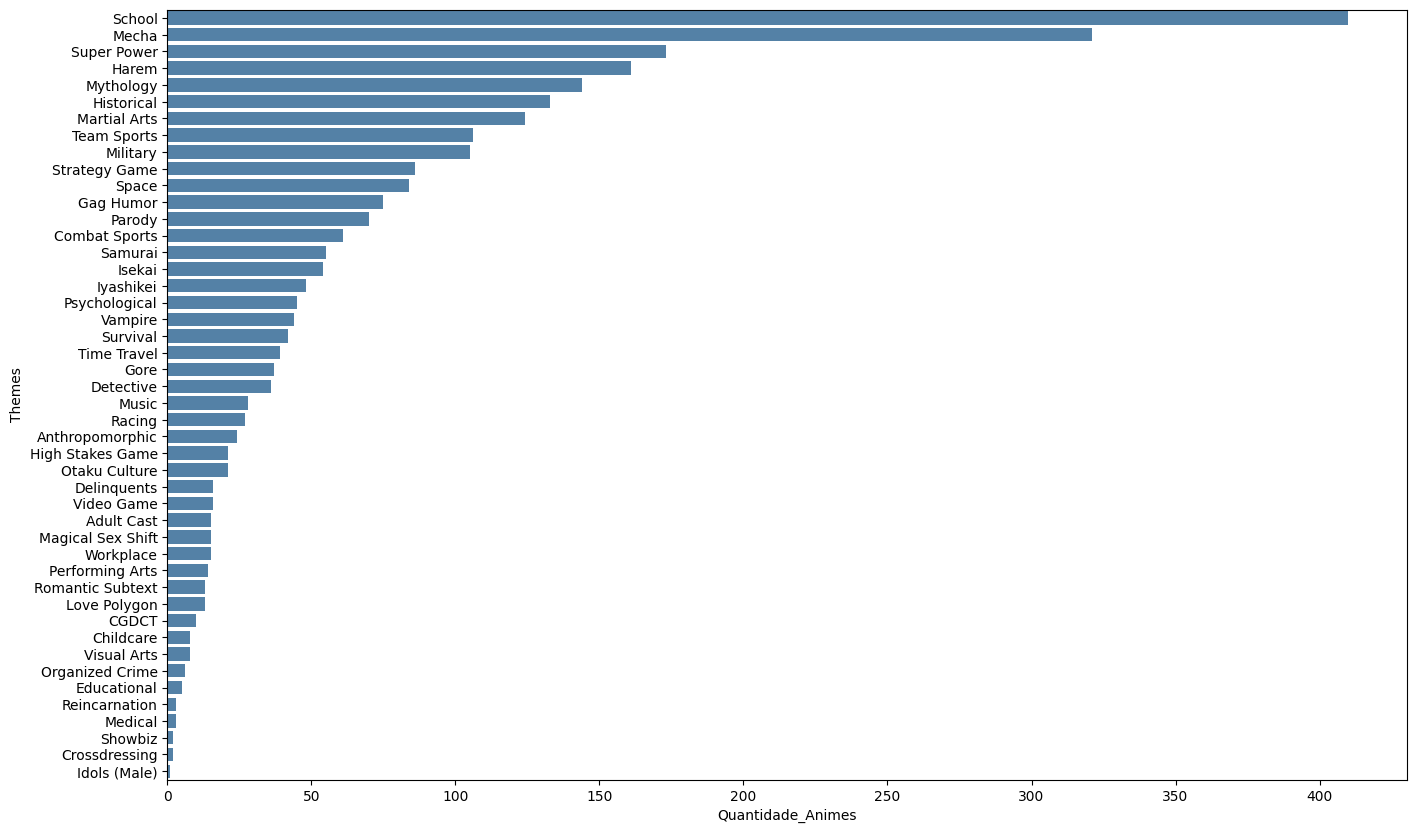

In [ ]:
plot_bar_temas_por_demografia("Shounen")

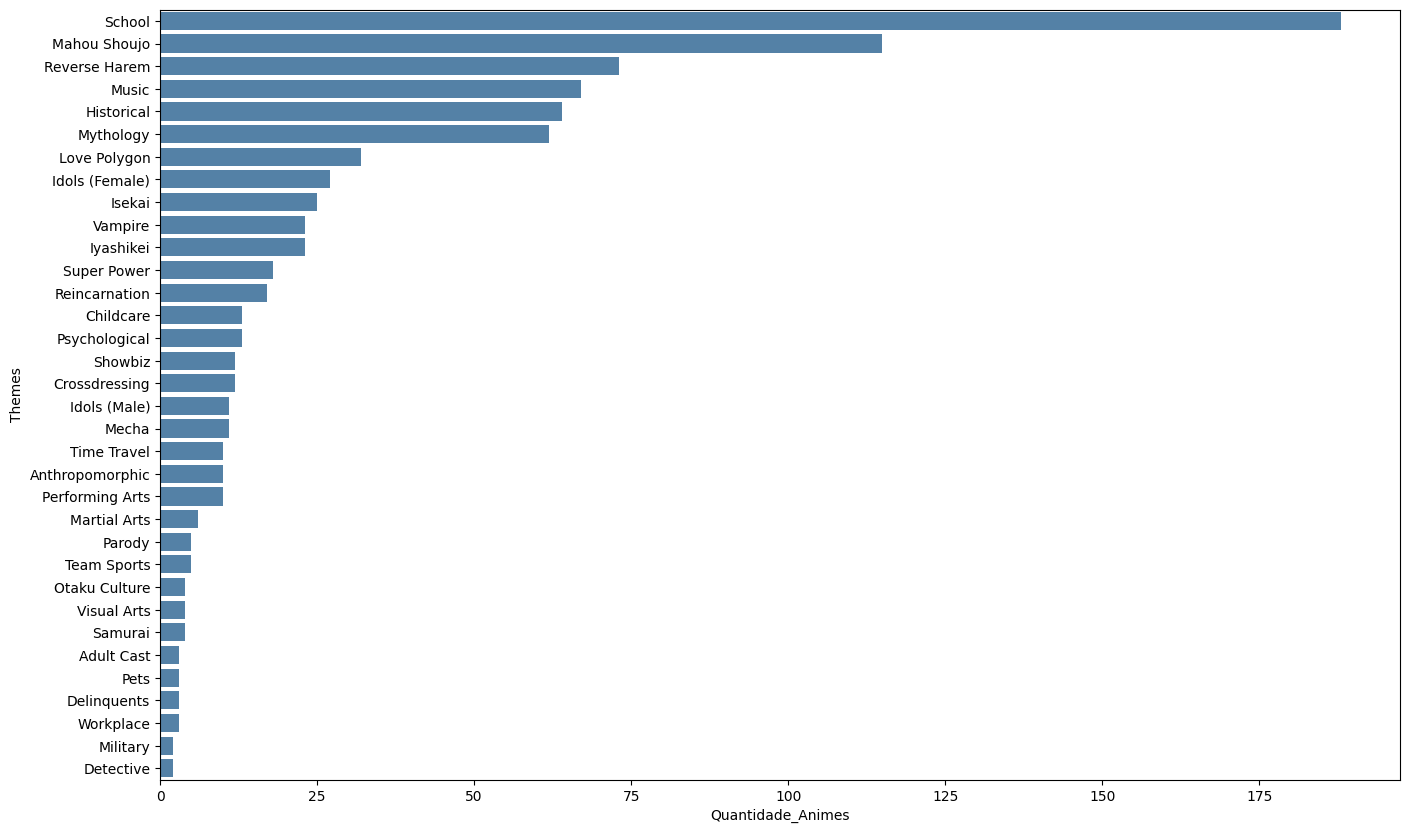

In [ ]:
plot_bar_temas_por_demografia("Shoujo")

#### Temas mais prevalentes entre as Demografias adultas

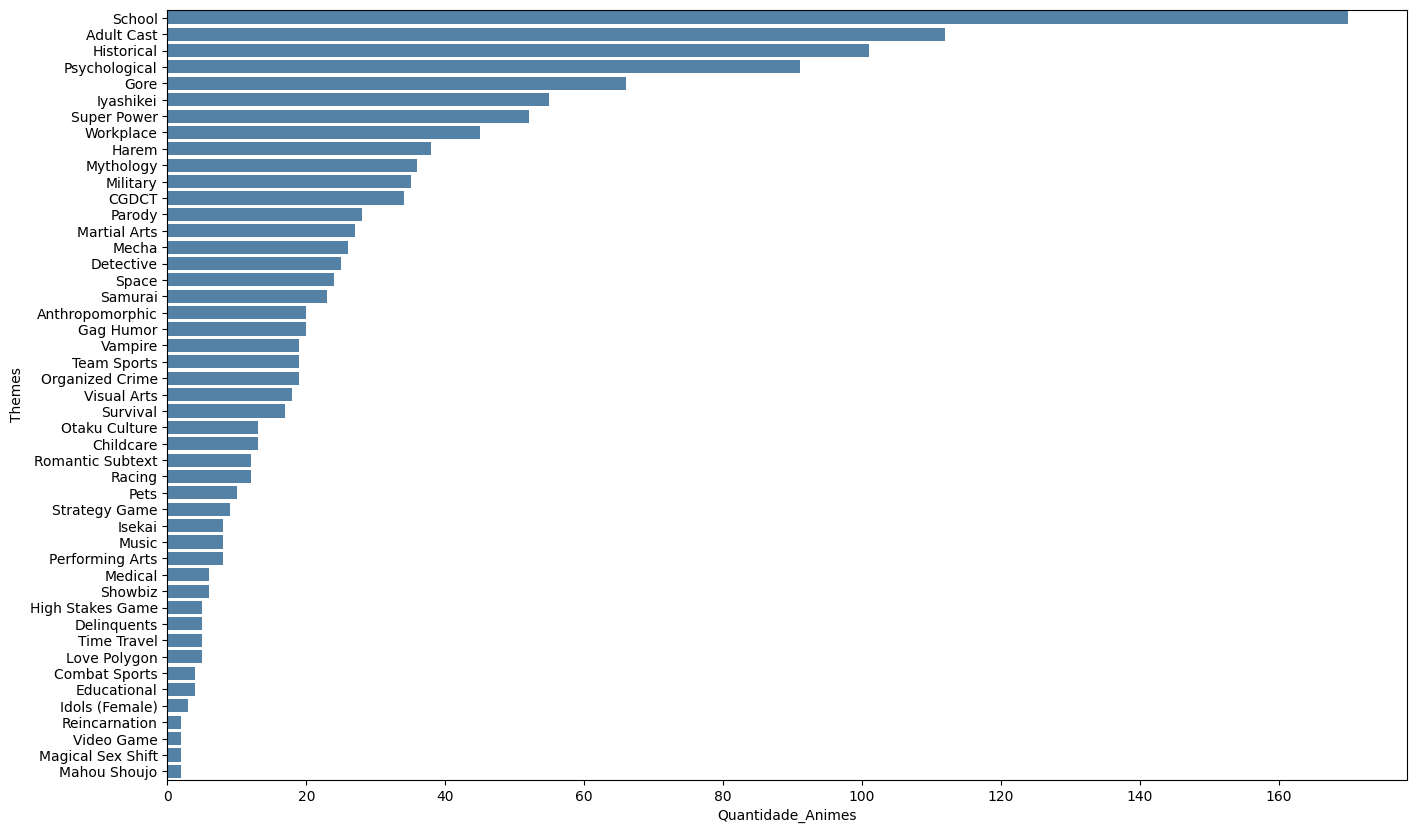

In [ ]:
plot_bar_temas_por_demografia("Seinen")

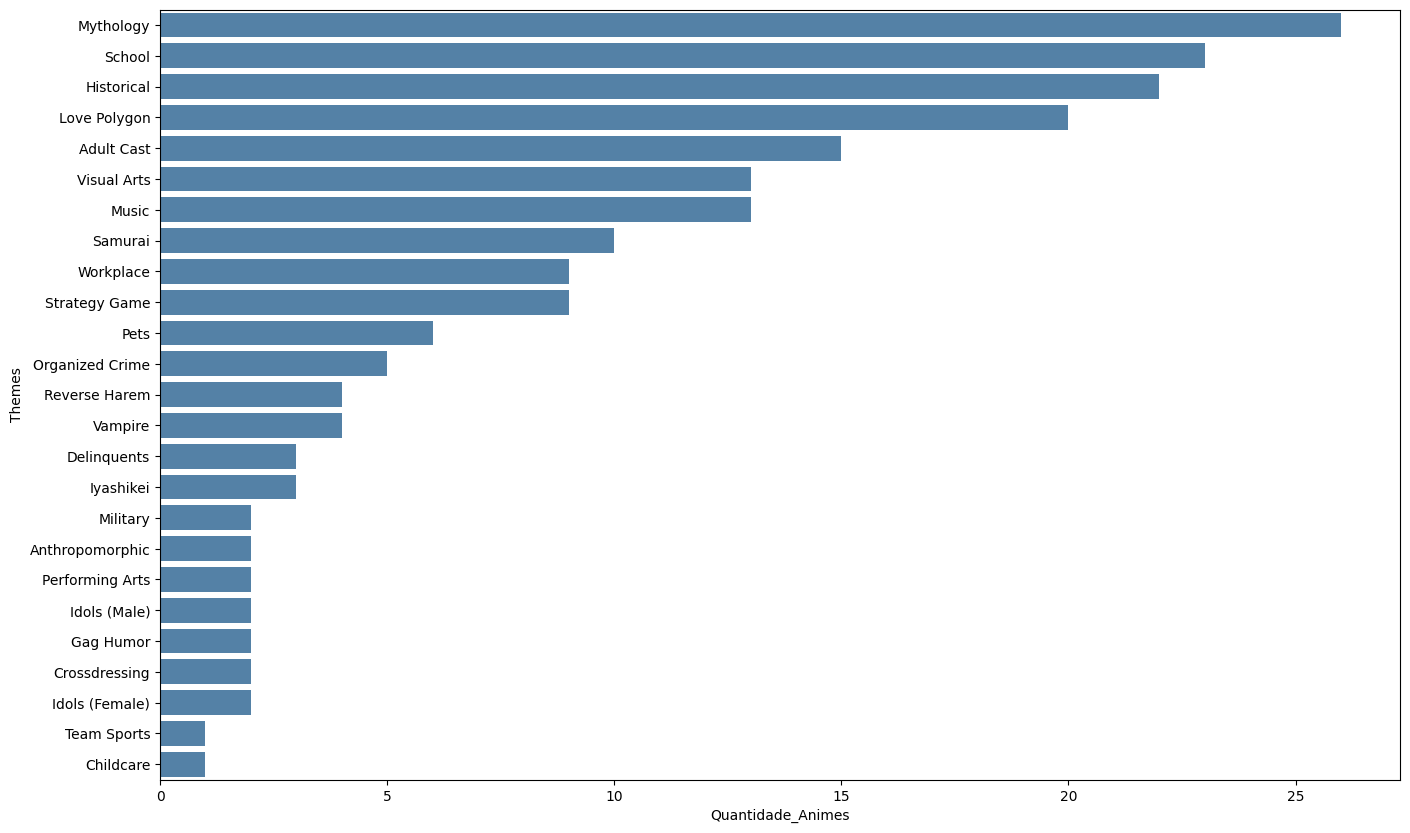

In [ ]:
plot_bar_temas_por_demografia("Josei")

#### Temas mais prevalentes para a Demografia infantil

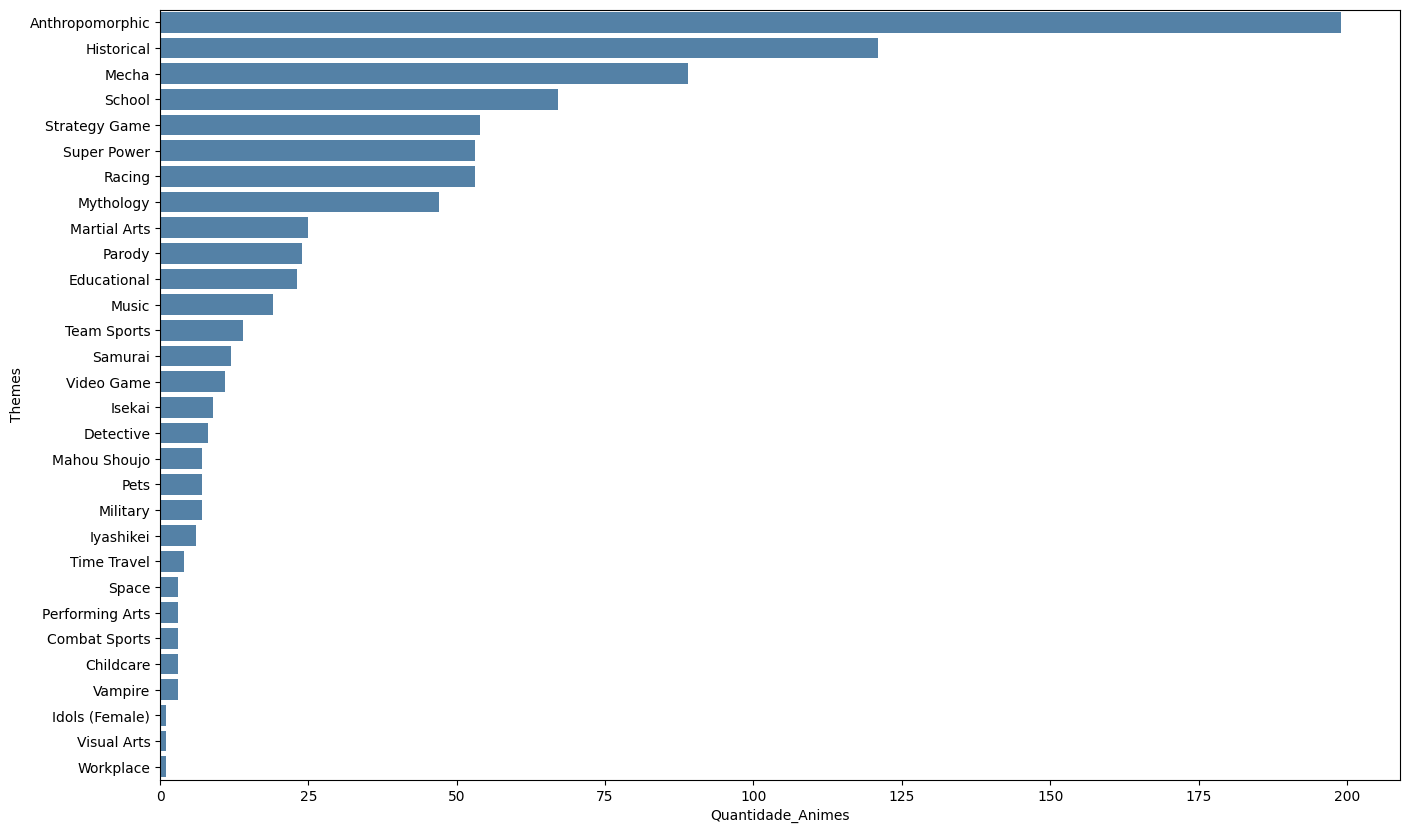

In [ ]:
plot_bar_temas_por_demografia("Kids")

Com isso, conseguimos verificar que tanto os Gêneros quanto os Temas são características que variam de acordo com o público alvo e que pode afetar diretamente a pouplaridade de um anime.

# Teste de Hipótese
___

## Teste de Permutação

No último tópico verificamos que os Gêneros e Temas aparentam ter uma influência sobre a recepção e popularidade de um anime.

Neste caso, queremos verificar se essa situação observada pode ser explicada pelo acaso. Para isso, iremos utilizar um Teste de Permutação, considerando o Gênero mais bem avaliado que foi o Suspense.

Primeiro, devemos separar entre os animes que são de Suspense e aqueles que não são desse Gênero.

In [ ]:
def separar_animes_suspense_nao_suspense():
  def identificar_animes_suspense(linha):
    genero_anime = linha["Genres"]

    if(genero_anime == "Suspense"):
      return 1

    return 0

  df_genero_animes = criar_dataframe_com_generos_separados()
  df_genero_animes = df_genero_animes[df_genero_animes["Genres"] != "Unknown"]

  df_ajustado = df_genero_animes[["Genres", "Members"]].copy()
  df_ajustado["identificador_suspense"] = df_ajustado.apply(identificar_animes_suspense, axis = 1)

  return df_ajustado.copy()

In [ ]:
def get_estatistica_observada_animes_suspense():
  df_filtrado = separar_animes_suspense_nao_suspense()
  df_medias = df_filtrado.groupby("identificador_suspense").mean(numeric_only = True).reset_index()

  media_animes_suspense = df_medias.loc[df_medias["identificador_suspense"] == 1, "Members"].iloc[0]
  media_animes_nao_suspense = df_medias.loc[df_medias["identificador_suspense"] == 0, "Members"].iloc[0]

  return (media_animes_suspense - media_animes_nao_suspense)

In [ ]:
valor_observado = get_estatistica_observada_animes_suspense()
print(f"A estatística observada da diferença entre as médias de animes de Suspense e não Suspense é: {valor_observado}")

A estatística observada da diferença entre as médias de animes de Suspense e não Suspense é: 399486.7365420477


Agora que temos a estatística observada para a méida, podemos aplicar um teste de permutação para verificar que essa estatística poderia ser explicada por uma mera aleatoriedade.

In [ ]:
def aplicar_teste_permutacao_animes_suspense():
  QUANTIDADE_TESTES = 10000

  df_filtrado = separar_animes_suspense_nao_suspense()
  coluna_flag_suspense = df_filtrado["identificador_suspense"].values

  medias_diferenca = np.zeros(QUANTIDADE_TESTES)

  for i in range(QUANTIDADE_TESTES):
    np.random.shuffle(coluna_flag_suspense)

    df_filtrado["identificador_suspense"] = coluna_flag_suspense
    df_medias = df_filtrado.groupby("identificador_suspense").mean(numeric_only = True).reset_index()

    media_casas_terreas = df_medias.loc[df_medias["identificador_suspense"] == 1, "Members"].iloc[0]
    media_casas_nao_terreas = df_medias.loc[df_medias["identificador_suspense"] == 0, "Members"].iloc[0]

    medias_diferenca[i] = (media_casas_terreas - media_casas_nao_terreas)

  limite_inferior = np.percentile(medias_diferenca, 2.5)
  limite_superior = np.percentile(medias_diferenca, 97.5)

  return (limite_inferior, limite_superior)

In [ ]:
limite_inferior, limite_superior = aplicar_teste_permutacao_animes_suspense()
print(f"({limite_inferior}, {limite_superior})")

(-64555.13967699069, 84462.72296879602)


In [ ]:
def devemos_aceitar_hipotese_nula(limite_inferior, limite_superior, valor_observado):
  nao_eh_aceita = (valor_observado < limite_inferior) | (valor_observado > limite_superior)

  if(~nao_eh_aceita):
    print(f"Devemos aceitar a hipótese nula, pois: {limite_inferior} < {valor_observado} < {limite_superior}")
  else:
    print(f"Devemos regeitar a hipótese nula, pois o valor observado {valor_observado} está fora do limite  ({limite_inferior}, {limite_superior})")

  return ~nao_eh_aceita

In [ ]:
devemos_aceitar_hipotese_nula(limite_inferior, limite_superior, valor_observado)

Devemos regeitar a hipótese nula, pois o valor observado 399486.7365420477 está fora do limite  (-64555.13967699069, 84462.72296879602)


False

Uma vez que o valor observado está muito além do intervalo gerado pelo teste de permutação, sabemos que podemos descartar a hipótese nula.

## Intervalo de Confiança

Também podemos fazer um intervalo de confiança para avaliar o tempo médio de duração dos episódios de cada tipo de mídia a fim de deixar mais claro a diferênça entre elas e o porquê de considerá-las como algo uniforme seria um equívoco.

In [ ]:
def calcular_intervalo_confianca_tempo_medio_tipo_midia():
  QUANTIDADE_TESTES = 5000
  tipos = ['TV', 'Movie', 'ONA', 'OVA', 'Special', 'Music']

  for tipo in tipos:

    df_tipo = df_animes_anime_list[df_animes_anime_list['Type'] == tipo]
    tempo_medio = np.zeros(QUANTIDADE_TESTES)

    for i in range(QUANTIDADE_TESTES):
      df_tipo_novo = df_tipo.sample(n=len(df_tipo), replace=True)
      tempo_medio[i] = df_tipo_novo['Duration_Minutes'].mean()

    LI = np.percentile(tempo_medio, 2.5)
    LS = np.percentile(tempo_medio, 97.5)

    if(LI - math.floor(LI) >= 0.60):
      LI = math.floor(LI) + 1 + (LI - math.floor(LI) - 0.6)
    if(LS - math.floor(LS) >= 0.60):
      LS = math.floor(LS) + 1 + (LS - math.floor(LS) - 0.6)

    print(tipo, "\n", "IC: ", (LI.round(2),LS.round(2)))

  return

In [ ]:
calcular_intervalo_confianca_tempo_medio_tipo_midia()

TV 
 IC:  (18.52, 19.34)
Movie 
 IC:  (49.19, 51.27)
ONA 
 IC:  (11.37, 12.35)
OVA 
 IC:  (27.44, 28.31)
Special 
 IC:  (20.19, 22.36)
Music 
 IC:  (3.25, 3.54)


# Pergunta 2 -- Temas predominantes por epoca
___

In [ ]:
#cria dataframe para análise de animes com base em temas
df_temas_para_pergunta2 = criar_dataframe_com_temas_separados()

#remove linhas sem data de inicio de exibição
index_unknown_aired_date = df_temas_para_pergunta2[df_temas_para_pergunta2['Start_Aired'] == 'Unknown'].index.values.tolist()
df_temas_para_pergunta2 = df_temas_para_pergunta2.drop(index_unknown_aired_date)

#transforma coluna de data de exibição em numérica, levando em conta apenas o ano
df_temas_para_pergunta2['Start_Aired'] = df_temas_para_pergunta2['Start_Aired'].str.slice(start=-4).astype(int)

#toma o valor máximo para cada tema com base no atributo selecionado (favoritos, membros e score)
df_temas_p2_favoritos = df_temas_para_pergunta2.groupby('Themes').max(numeric_only = True).sort_values(by=['Favorites'], ascending=False)
df_temas_p2_membros = df_temas_para_pergunta2.groupby('Themes').max(numeric_only = True).sort_values(by=['Members'], ascending=False)
df_temas_p2_scores = df_temas_para_pergunta2.groupby('Themes').max(numeric_only = True).sort_values(by=['Score'], ascending=False)

# Perguta 3 - Animes que influênciam os outros
___

# Modelo previsão com Regressão Multipla
___


Agora que já realizamos a visualização dos dados e os testes de hipótes, podemos tentar criar um modelo de predição para o dataframe e responder a quarta pergunta do trabalho: "É possível prever a popularidade de um anime com base em outras características?".

Para isso, devemos definir as nossas variáveis de predição e a nossa variável de resposta, além de verificar possíveis correlações entre outras variáveis.

## Verificando correlações

Primeiro iremos verificar a correlação entre as variáveis numéricas da base de dados.

Uma coisa importante de considerar é que temos algumas variáveis que foram derivadas a partir de outras.

A primeria delas é o "Scored_Users", "Score" e o "Ranked", que são

*   "Scored_Users": É a quantidade de usuários que atribuiram uma pontuação para o anime associado.
*   "Score": É a pontuação final calculada pelo MyAnimeList com base na média das notas atribuidas por cada "Scored_User".
*   "Ranked": É a posição do anime em relação aos outros com base em seu "Score".

Outras duas variáveis numéricas que estão diretamente relacionadas são a "Popularity" e "Members".

*   "Members": É a quantidade de usuários que adicionaram aquele anime a sua lista no MyAnimeList.
*   "Popularity": É a posição do anime com base na quantidade de membros que ele tem.

Assim, quanto mais membros um anime tem, mais popular ele é e maior será a sua posição (mais próxima do 1° lugar, assim o valor da posição no ranking diminui com base na quantidade de membros).

Nós podemos fazer um pairplot sobre os valores numéricos que são relevantes:

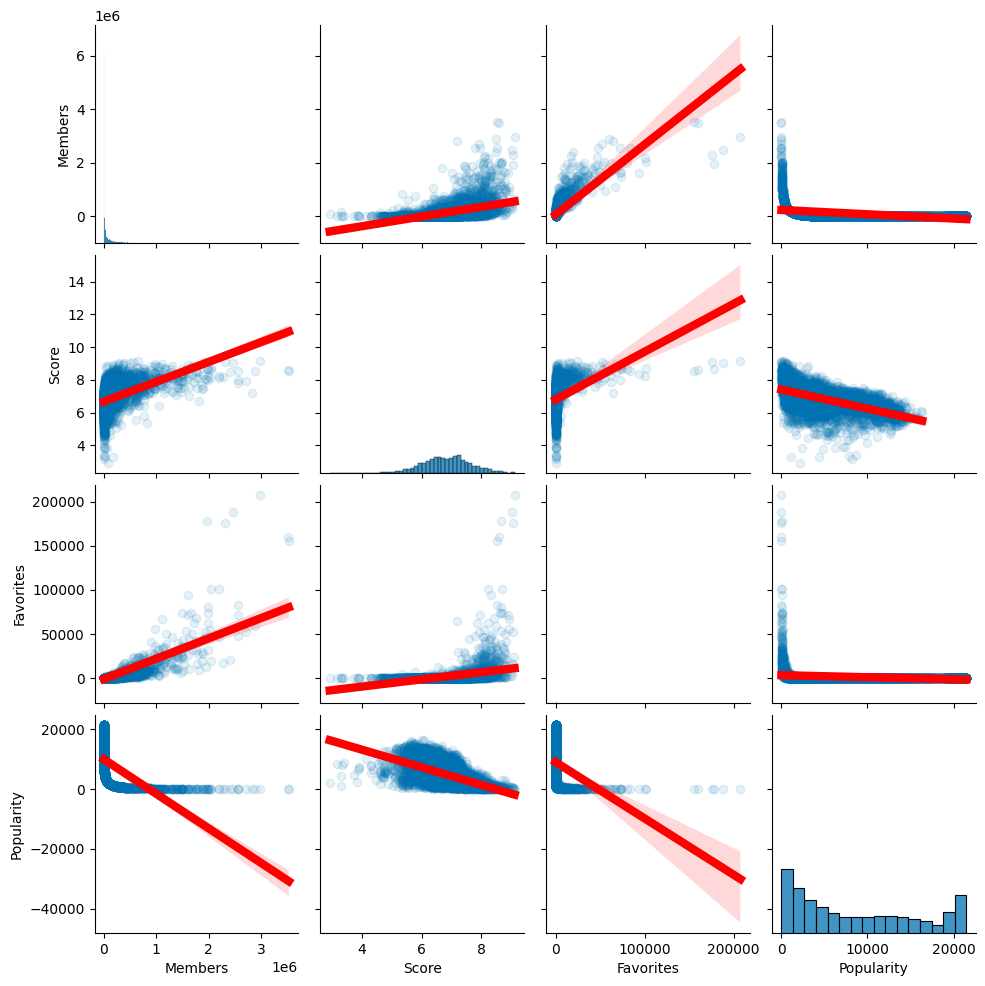

In [105]:
plot = sns.pairplot(
  df_my_anime_list[["Members", "Score", "Favorites", "Popularity"]],
  kind = "reg",
  plot_kws = {
      'line_kws': { 'color': 'red' },
      'scatter_kws': { 'alpha':  0.1 }
  }
)

plt.show()

É possível notar pelo pairplot que há uma relação muito forte entre a quantidade de Membros e a quantidade de Favoritos

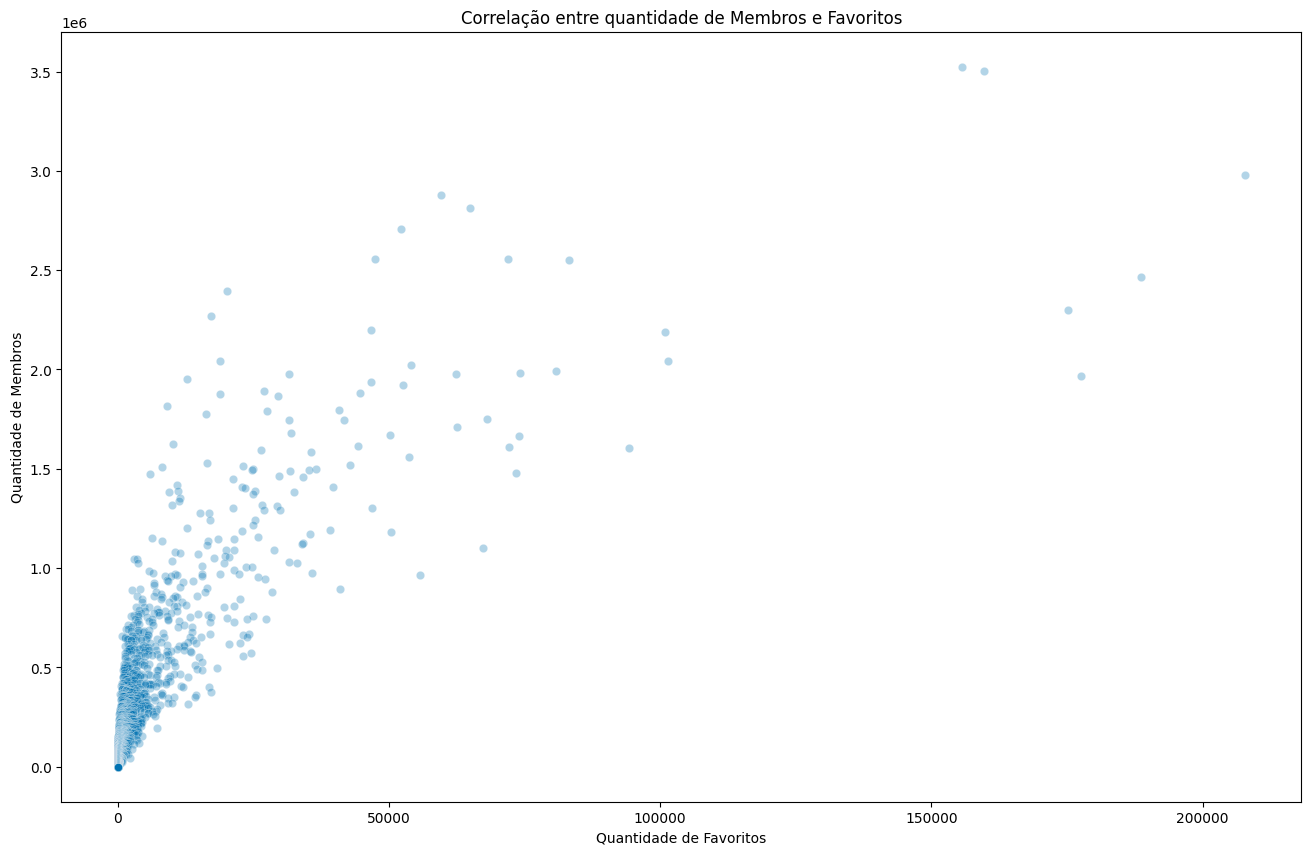

In [106]:
plot = sns.scatterplot(
    df_my_anime_list[["Members", "Favorites"]],
    x = df_my_anime_list["Favorites"],
    y = df_my_anime_list["Members"],
    alpha = 0.3
)

plot.set(title = "Correlação entre quantidade de Membros e Favoritos")
plot.set_ylabel("Quantidade de Membros")
plot.set_xlabel("Quantidade de Favoritos")

plt.show()

Ao fazer o plot de Membros por Score, não conseguimos ver uma relação muito clara entre os dois:

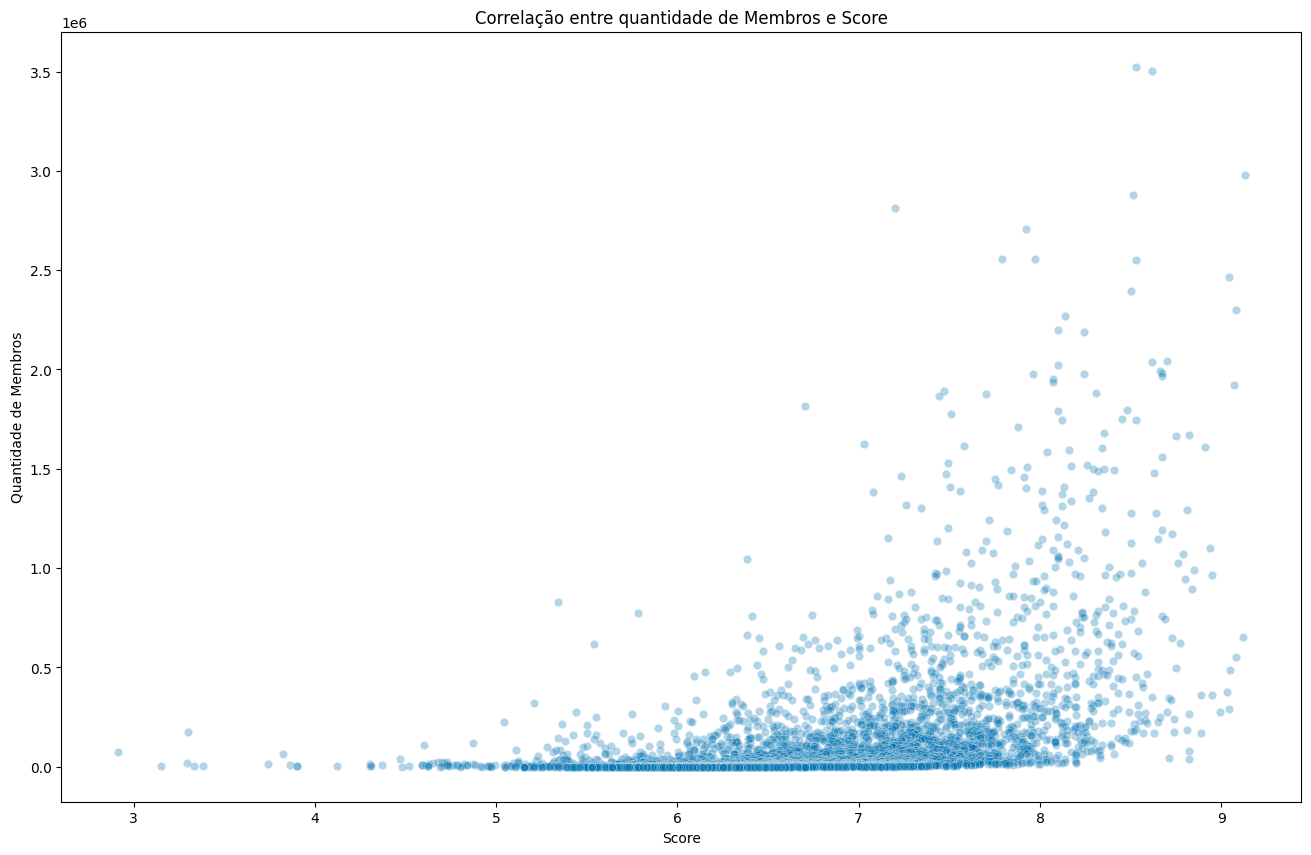

In [108]:
plot = sns.scatterplot(
    df_my_anime_list[["Members", "Score"]],
    x = df_my_anime_list["Score"],
    y = df_my_anime_list["Members"],
    alpha = 0.3
)

plot.set(title = "Correlação entre quantidade de Membros e Score")
plot.set_ylabel("Quantidade de Membros")
plot.set_xlabel("Score")

plt.show()

Ao fazer o plot de Membros por Score, não conseguimos ver uma relação muito clara entre os dois. Contudo, se utilizarmos o ranking da Popularidade pelo Score, conseguimos ver uma relação mais clara:

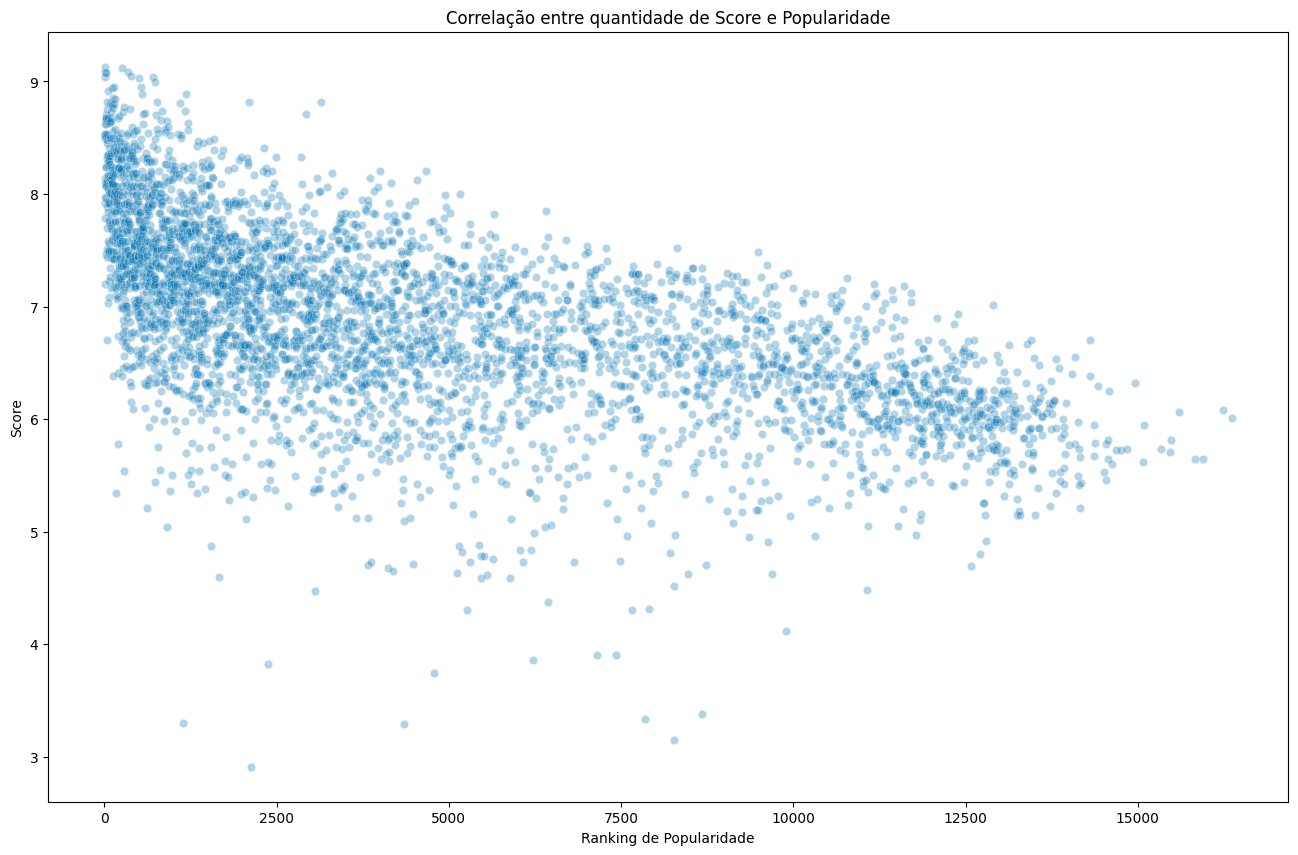

In [109]:
plot = sns.scatterplot(
    df_my_anime_list[["Score", "Popularity"]],
    x = df_my_anime_list["Popularity"],
    y = df_my_anime_list["Score"],
    alpha = 0.3
)

plot.set(title = "Correlação entre quantidade de Score e Popularidade")
plot.set_ylabel("Score")
plot.set_xlabel("Ranking de Popularidade")

plt.show()

Com isso, vemos uma tendência dos animes mais populares a ter uma pontuação maior.

Agora que já verificamos as relações entre as variáveis numéricas, podemos começar a testar os modelos com elas e as variáveis categóricas.

## Testando Modelos

Primeiro iremos definir algumas funções que irão auxiliar testar diferentes conjuntos de variáveis de predição:

In [ ]:
# Adapta do dataframe para ter apenas informações relevantes para as regressões
def criar_df_para_regressao():
  df_referencia = criar_dataframe_com_todos_grupos_separados()

  df_regressao = df_referencia[['Demographics', 'Themes', 'Genres', 'Members', 'Favorites', 'Score']].copy()
  df_regressao = df_regressao[(df_regressao['Demographics'] != 'Unknown') & (df_regressao['Themes'] != 'Unknown') & (df_regressao['Genres'] != 'Unknown')]
  df_regressao['Score'] = df_regressao['Score'].fillna(0)

  return df_regressao

In [ ]:
def z_normalizar(coluna):
  return (coluna - coluna.mean()) / coluna.std(ddof = 1)

Como iremos lidar com variáveis categóricas como "Themes", "Genres" e "Demographics", nós precisamos converê-las para que possam ser usadas no modelo de regressão.

Para isso, iremos utilizar o One Hot Enconding, que fará um mapeamento de cada uma dessa variável categórica a valores (semelhante a uma tabela binária):

In [ ]:
def one_hot_encoding_para(df, coluna):
  dummies = pd.get_dummies(df[coluna])

  df_encoding = pd.concat([df, dummies], axis = 1)
  df_encoding = df_encoding.drop([coluna], axis = 1)

  return df_encoding

Um exemplo de mapeamento seria o seguinte para as demografias:

In [ ]:
df_teste_one_hot_encoding = criar_df_para_regressao()
one_hot_encoding_para(df_teste_one_hot_encoding, 'Demographics')

,Themes,Genres,Members,Favorites,Score,Josei,Kids,Seinen,Shoujo,Shounen
0,Gore,Action,3524109,155695,8.531,0,0,0,0,1
1,Gore,Drama,3524109,155695,8.531,0,0,0,0,1
2,Military,Action,3524109,155695,8.531,0,0,0,0,1
3,Military,Drama,3524109,155695,8.531,0,0,0,0,1
4,Survival,Action,3524109,155695,8.531,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
18011,Anthropomorphic,Fantasy,15,0,0.000,0,1,0,0,0
18012,Anthropomorphic,Fantasy,15,0,0.000,0,1,0,0,0
18014,Anthropomorphic,Fantasy,15,0,0.000,0,1,0,0,0
18016,Anthropomorphic,Fantasy,15,0,0.000,0,1,0,0,0


Assim, é possível notar que, para cada valor diferente da variável categórica, haverá uma nova coluna indicando 1 ou 0, caso aquela linha pertença a demografia ou não, respectivamente.

Por fim, temos a função para criar as diferentes regressões que iremos testar. No caso, iremos utilizar o método OLS da Statsmodels:

In [ ]:
def gerar_regrecao(df_regressao):
  # Devemos z-normalizar as colunas numéricas
  df_regressao['Score'] = z_normalizar(df_regressao['Score'])
  df_regressao['Favorites'] = z_normalizar(df_regressao['Favorites'])
  df_regressao['Members'] = z_normalizar(df_regressao['Members'])

  # Gerar modelo da regressão com Stats Model
  variaveis_predicao = df_regressao.drop(['Members'], axis = 1)
  variavel_resposta = df_regressao['Members']

  variaveis_predicao = sm.add_constant(variaveis_predicao)
  modelo = sm.OLS(variavel_resposta, variaveis_predicao).fit()

  print(modelo.summary())

  # Código equivalente para gerar utilizando sklearn
  # modelo = LinearRegression()
  # modelo.fit(variaveis_predicao, variavel_resposta)

  # print(modelo.predict(variaveis_predicao))
  # print(modelo.score(variaveis_predicao, variavel_resposta))

  return modelo

### Regressão com todas características

Membros = Favoritos + Socre + Temas + Genero + Demografia

A primeira regressão que iremos testar é uma com todas as variáveis numéricas e categóricas, que estamos considerando.

In [ ]:
def criar_regressao_completa():
  df_regressao = criar_df_para_regressao()

  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Genres')
  df_regressao = df_regressao.drop(['Avant Garde'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_completo = criar_regressao_completa()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:09   Log-Likelihood:                -4436.4
No. Observations:                5735   AIC:                             9019.
Df Residuals:                    5662   BIC:                             9505.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4650      0.548  

Devido ao alto valor de "t" e o baixo valor de "P>|t|", além dos intervalos de confiânça não centrados em zero, podemos ver como as variáveis numéricas "Score" e "Favorites" possuem alta relevância para o modelo.

Por outro lado, as variáveis categóricas ficam um pouco defícil de serem análisadas como um todo. Para isso, iremos fazer uma regressão para cada uma separadamente e iremos compará-los.

**Observação**: Um detalhe importante é remover uma coluna ao fazer o One Hot Enconding a fim de não ter variáveis multicolineares. Caso não fizéssemos isso, haveria um aviso na parte de Notes. No caso, optamos por remover sempre a coluna que seria menos relevate para o modelo. O critério de remoção foram aquelas qeu que possuem menos animes associados a eles.

### Regressão com Temas

Membros = Favoritos + Score + Temas

In [ ]:
def criar_regressao_temas():
  df_regressao = criar_df_para_regressao()

  # Como são só Temas, vamos remover as colunas 'Demographics', 'Genres'
  df_regressao = df_regressao.drop(['Demographics', 'Genres'], axis = 1)
  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')

  # Para evitar multi-colinearidade devemos remover uma coluna
  # Iremos remover a coluna com o Tema menos comum
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_temas = criar_regressao_temas()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     280.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:10   Log-Likelihood:                -4530.0
No. Observations:                5735   AIC:                             9164.
Df Residuals:                    5683   BIC:                             9510.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1657      0.130  

Ao criar um modelo com apenas os Temas de variáveis categóricas, vemos que ele se aproxima muito do modelo original, com um R² = 0.716. Assim, é possível notar que os temas possuem uma relevância para o modelo.

### Regressão com Gêneros

Membros = Favoritos + Score + Generos

In [112]:
def criar_regressao_generos():
  df_regressao = criar_df_para_regressao()

  # Como são só Temas, vamos remover as colunas 'Demographics', 'Themes'
  df_regressao = df_regressao.drop(['Demographics', 'Themes'], axis = 1)
  df_regressao = one_hot_encoding_para(df_regressao, 'Genres')

  # Para evitar multi-colinearidade devemos remover uma coluna
  # Iremos remover a coluna com o Tema menos comum
  df_regressao = df_regressao.drop(['Avant Garde'], axis = 1)

  return gerar_regrecao(df_regressao)

In [113]:
modelo_regressao_generos = criar_regressao_generos()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     587.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:15:48   Log-Likelihood:                -5031.6
No. Observations:                5735   AIC:                         1.010e+04
Df Residuals:                    5715   BIC:                         1.024e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2278      0.583      0.391

Neste caso, por mais que tenhamos um R² razoável, é possível ver que todos os gêneros possuem intervalos de confiânça centrados em zero e que variam entre valores positivos e negativos.

Além disso, verificamos que o valor "t" é bem baixo e o "P>|t|" é muito alto, indicando que essas variáveis não possuem muita influência no modelo.

Assim, podemos desconsiderar os gêneros no modelo final.

### Regressão com Demografias

Membros = Favoritos + Score + Demografia

In [ ]:
def criar_regressao_demografias():
  df_regressao = criar_df_para_regressao()

  # Como são só Temas, vamos remover as colunas 'Themes', 'Genres'
  df_regressao = df_regressao.drop(['Themes', 'Genres'], axis = 1)
  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')

  # Para evitar multi-colinearidade devemos remover uma coluna
  # Iremos remover a coluna com o Tema menos comum
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_demografias = criar_regressao_demografias()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1820.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:10   Log-Likelihood:                -5077.6
No. Observations:                5735   AIC:                         1.017e+04
Df Residuals:                    5728   BIC:                         1.022e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1257      0.029     -4.299      0.0

Por fim, temos as demografias, em que os seus coeficientes demonstram que quando as elas são voltadas para o público feminino a quantidade de membros tende a ser menor.

### Regressão final

Membros = Favoritos + Score + Temas + Demografia

Então, acreditamos que seja interessante utilizar as variáveis categóricas de temas e demografia para tentar prever a quantidade de membros de um anime.

In [ ]:
def criar_regressao_final():
  df_regressao = criar_df_para_regressao()
  df_regressao = df_regressao.drop(['Genres'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_final = criar_regressao_final()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     267.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:11   Log-Likelihood:                -4475.4
No. Observations:                5735   AIC:                             9063.
Df Residuals:                    5679   BIC:                             9435.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2651      0.132  

### Regressão apenas com valores-t mais relevantes

Podemos fazer mais um ajuste na regressão, que é eleminar as categorias desnecessárias das Demografias e Temas.

Ao remover aquelas que possuem "t" valor baixo e "P>|t|", além de intervalaos de confiânça variando entre os números positivos e negativos, obtemos a seguinte regressão:

In [ ]:
def criar_regressao_valores_t_relevantes():
  df_regressao = criar_df_para_regressao()
  df_regressao = df_regressao.drop(['Genres'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  df_regressao = df_regressao[['Members', 'Favorites', 'Score', 'Survival', 'Gore', 'School', 'Super Power', 'Harem', 'Psychological', 'Romantic Subtext', 'High Stakes Game', 'Shounen', 'Shoujo']].copy()
  return gerar_regrecao(df_regressao)

In [ ]:
modelo_valores_t_relevantes = criar_regressao_valores_t_relevantes()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:11   Log-Likelihood:                -4632.7
No. Observations:                5735   AIC:                             9291.
Df Residuals:                    5722   BIC:                             9378.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1215      0.013  

## Avaliando o Modelo

Nós podemos avaliar a qualidade de um módelo a partir de duas métricas:

* R²: Mede o quanto que a variância da variável dependente pode ser explicada pelas variáveis independentes.
* MSE: O quão distântes estão os pontos da regressão em média. Quanto menor o valor, menor é o erro e melhor a reta captura os pontos.

Ao comparar os valores do R² dos modelos gerados, temos o seguinte:

In [ ]:
print("Os valores de R² para cada modelo gerado foram os seguintes:")
print(f"\t* Modelo completo: {modelo_completo.rsquared}")
print(f"\t* Modelo apenas com Temas: {modelo_regressao_temas.rsquared}")
print(f"\t* Modelo apenas com Gêneros: {modelo_regressao_generos.rsquared}")
print(f"\t* Modelo apenas com Demografias: {modelo_regressao_demografias.rsquared}")
print(f"\t* Modelo Final, com Temas e Demografias: {modelo_regressao_final.rsquared}")
print(f"\t* Modelo apenas com valores 't' relevantes: {modelo_valores_t_relevantes.rsquared}")

Os valores de R² para cada modelo gerado foram os seguintes:
	* Modelo completo: 0.7248864240185722
	* Modelo apenas com Temas: 0.7157571943229346
	* Modelo apenas com Gêneros: 0.6614279636301847
	* Modelo apenas com Demografias: 0.6559422633279886
	* Modelo Final, com Temas e Demografias: 0.7211176470056522
	* Modelo apenas com valores 't' relevantes: 0.705391742472731


Com isso, vemos que os modelos que incluem os temas são os mais próximos do modelo completo.

No entanto, o alto valor R² indica que todos os modelos são interessantes de serem utilizados. Além disso, podemos lembrar que todos obtiveram um valor alto do "f-statistic" nos relatórios gerados anteriormente, que indica que a hipótese nula (considera um modelo sem variáveis preditivas) para esses modelos é regeitada.

Já considerando, os erros quadrados (MSE) temos que:

In [ ]:
print("Os valores do MSE para cada modelo gerado foram os seguintes:")
print(f"\t* Modelo completo: {modelo_completo.mse_model}")
print(f"\t* Modelo apenas com Temas: {modelo_regressao_temas.mse_model}")
print(f"\t* Modelo apenas com Gêneros: {modelo_regressao_generos.mse_model}")
print(f"\t* Modelo apenas com Demografias: {modelo_regressao_demografias.mse_model}")
print(f"\t* Modelo Final, com Temas e Demografias: {modelo_regressao_final.mse_model}")
print(f"\t* Modelo apenas com valores 't' relevantes: {modelo_valores_t_relevantes.mse_model}")

Os valores do MSE para cada modelo gerado foram os seguintes:
	* Modelo completo: 57.72914937947904
	* Modelo apenas com Temas: 80.47356376956286
	* Modelo apenas com Gêneros: 199.61199702397252
	* Modelo apenas com Demografias: 626.8621563204475
	* Modelo Final, com Temas e Demografias: 75.1797925078256
	* Modelo apenas com valores 't' relevantes: 337.0596876115532


Nesse caso, é possível notar que o valor do erro aumenta considerávelmente nos modelos que desconsideram os temas, incluindo o que inclui apenas os maiores valores "t".

Assim, o modelo que possui menos erro entre todos é o Modelo Completo:

> Membros = Favoritos + Score + Temas + Demografia + Genero

Por outro lado, é possível notar que ao remover apenas os Gêneros do Modelo Completo, o erro quadrado não tem um aumento significativo. Isso nos leva ao nosso Modelo Final:

> Membros = Favoritos + Score + Temas + Demografia

## Interpretação dos Resultados

Considerando o nosso modelo final, temos:

In [111]:
print(modelo_regressao_final.summary())

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     267.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:51:06   Log-Likelihood:                -4475.4
No. Observations:                5735   AIC:                             9063.
Df Residuals:                    5679   BIC:                             9435.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2651      0.132  

# Conclusão
___